# Test/Training Split


When building machine learning models, it's crucial to split the available data into two sets: training and testing.

#### Training Set:
- **Purpose**: Used to train the model, allowing it to learn patterns and relationships from the data.
- **Size**: Typically larger than the test set.
- **Evaluation**: Model performance is not assessed on this data.

#### Test Set:
- **Purpose**: Reserved for evaluating the model's performance.
- **Size**: Smaller than the training set but representative of the overall data.
- **Evaluation**: Model performance is assessed here to understand its generalization ability.

##### Choice of Split Ratio
- The 20/80 split (20% test, 80% train) is a common choice.
- It strikes a balance between providing enough data for training and ensuring a robust evaluation.
- Factors such as data size, model complexity, and statistical significance influence the split ratio choice.

In [6]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [7]:
df = pd.read_csv('../data/data_feature_engineering.csv')
df.head()

,price,name,distance,source,destination,precipIntensity,humidity,temperatureHigh,apparentTemperatureHigh,uvIndex,precipIntensityMax,temperatureMax,apparentTemperatureMax
0,12.0,4,1.11,6,11,0.0000,0.60,42.52,40.53,0,0.0003,42.52,40.53
1,16.0,0,1.11,6,11,0.0000,0.66,33.83,32.85,0,0.0001,33.83,32.85
2,7.5,3,1.11,6,11,0.0000,0.56,33.83,32.85,0,0.0001,33.83,32.85
3,7.5,5,1.11,6,11,0.0567,0.86,43.83,38.38,0,0.1252,43.83,38.38
4,26.0,1,1.11,6,11,0.0000,0.64,33.83,32.85,0,0.0001,33.83,32.85


In [8]:
X = df.drop(columns=['price'])
y = df['price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(264454, 12) (66114, 12) (264454,) (66114,)


# Modeling Process

Now that the data has been cleaned and the key features have been selected, it's time to model the data with the goal of predicting the correct price. For this analysis, we have chosen to employ five different models:

1. **Linear Regression (Base):** A simple and interpretable model that establishes a linear relationship between the predictor variables and the target variable.

2. **Random Forest Decision Tree (Base):** An ensemble learning technique that constructs multiple decision trees during training and outputs the mean prediction of the individual trees.

3. **Gradient Boosting:** Another ensemble method that builds models sequentially, with each new model correcting errors made by the previous ones.

4. **K-Nearest Neighbor (KNN):** A non-parametric method that predicts the value of a target variable by averaging the values of its k nearest neighbors.

5. **Neural Network:** A deep learning model composed of multiple layers of interconnected nodes, capable of learning complex patterns in the data.

We aim to evaluate the models performances and select the one that best predicts the price. Evaluation will be based on several performance metrics:

- **Mean Squared Error (MSE):** This metric measures the average squared difference between the actual and predicted values. It provides an overall idea of how well the model is performing.

- **Root Mean Squared Error (RMSE):** Similar to MSE but in the same units as the target variable. RMSE gives a more intuitive understanding of the model's performance.

- **R-squared (R^2) value:** This metric indicates the proportion of the variance in the target variable that is predictable from the independent variables. A higher R-squared value suggests a better fit of the model to the data.

By considering these metrics, we can assess the performance of each model and choose the one that has the best balance between accuracy and interpretability. Additionally, computational efficiency will also be considered to ensure that the chosen model is practical for this objective.


### 1. Linear Regression
The statistical method linear regression is used to model the relationship between dependent and independent variables by fitting a linear equation to the observed data. We will be using linear regression to understand and predict the behavior of our Price, X, variable, based on our explanatory, y, variables. 

In [10]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

# Fit a linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

#Based off the model predict the y values given the test data
predictions = model.predict(X_test)

#Evaluation Metrics
# Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# R-squared (R2)
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 42.62018108476955
R-squared: 0.4112083327373267
Root Mean Squared Error: 6.528413366566914


The model has yielded an MSE of 42.620, the R2 value of 0.411, and a RMSE of about 8.04. The metrics show us that the average squared difference between the actual and predicted values of the price, is approximately 42.62, the model only explains around 41.1% of the variability and the average predicted error is 6.528. While the model demonstrates adequate predictive capability, the relatively high MSE and RMSE values and the low R-squared suggest limited explanatory power. Therefore, this linear regression model may not be the most suitable choice for accurately predicting prices in this context but can be used as a good base.

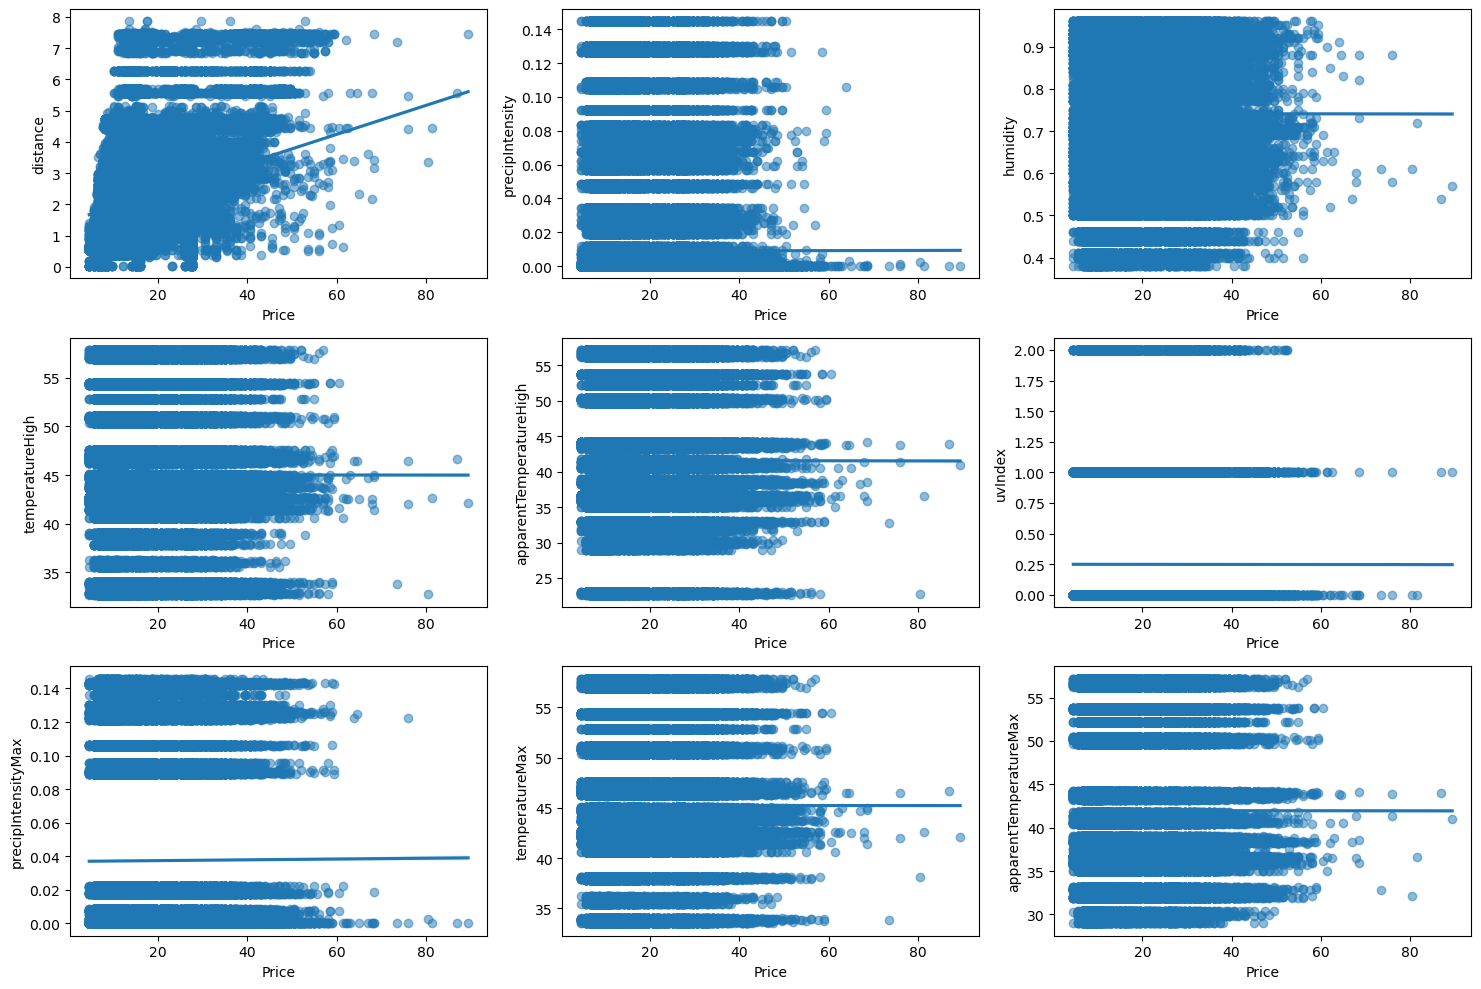

In [11]:

# Plotting regression line for each exploratory variable
exploratory_vars = ['distance', 'precipIntensity', 'humidity', 'temperatureHigh', 
                    'apparentTemperatureHigh', 'uvIndex', 'precipIntensityMax', 
                    'temperatureMax', 'apparentTemperatureMax']

plt.figure(figsize=(15, 10))

for i, var in enumerate(exploratory_vars):
    plt.subplot(3, 3, i+1)
    sns.regplot(y=df[var], x=df['price'], scatter_kws={'alpha':0.5})
    plt.xlabel('Price')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

**Distance vs. Price**: Shows a positive correlation; as distance increases, price tends to increase.

**Precipitation Intensity vs. Price**: No clear relationship; the price does not change significantly with varying precipitation intensities.

**Humidity vs. Price**: No clear relationship; humidity levels do not show a distinct effect on price.

**Temperature vs. Price**: Weak positive correlation; higher temperatures might slightly increase prices.

**Apparent Temperature vs. Price**: Weak positive correlation; similar to temperature, higher apparent temperatures might slightly increase prices.

**UV Index vs. Price**: No clear relationship; UV index does not appear to influence Uber prices.

Overall, distance seems to be the most significant factor affecting Uber prices in these graphs, while weather-related factors have little to no clear impact.


##  Decision Trees Regression & Random Forest Method

In [18]:
from sklearn.tree import DecisionTreeRegressor, export_text
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

In [19]:
model1 = DecisionTreeRegressor(max_depth=10, random_state=42)
model1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

We changed the Max_depth to a range of values from 2 to 100 and we based our final result on the lowest MSE keeping overfitting and underfitting in mind. In this case the change in max dept for a high number such as 100 lead to a higher MSE value. 

In [21]:
model1_text = export_text(model1)
print(model1_text)
y_pred1 = model1.predict(X_test)

print("Actual vs. Predicted values:\n")
for actual, predicted in zip(y_test[:10], y_pred1[:10]):
    print(f"Actual: {actual:.2f} - Predicted: {predicted:.2f}")

|--- feature_0 <= 1.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_1 <= 2.20
|   |   |   |--- feature_1 <= 1.64
|   |   |   |   |--- feature_1 <= 1.35
|   |   |   |   |   |--- feature_1 <= 1.11
|   |   |   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |   |   |--- feature_11 <= 50.30
|   |   |   |   |   |   |   |   |--- feature_3 <= 1.00
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 0.69
|   |   |   |   |   |   |   |   |   |   |--- value: [15.38]
|   |   |   |   |   |   |   |   |   |--- feature_5 >  0.69
|   |   |   |   |   |   |   |   |   |   |--- value: [14.38]
|   |   |   |   |   |   |   |   |--- feature_3 >  1.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 1.09
|   |   |   |   |   |   |   |   |   |   |--- value: [15.36]
|   |   |   |   |   |   |   |   |   |--- feature_1 >  1.09
|   |   |   |   |   |   |   |   |   |   |--- value: [15.12]
|   |   |   |   |   |   |   |--- feature_11 >  50.30
|   |   |   |   |   |   |   |   |--- feature_10 <= 51.99
|   | 

In [22]:
#Evaluating the Model
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred1)
# These metric are being used for all models to compare which model is best.

# Print the performance metrics
print("MSE (Mean Squared Error):", mse)
print("RMSE (Root Mean Squared Error):", rmse)
print("R² (Coefficient of Determination):", r2)

MSE (Mean Squared Error): 3.68952803961773
RMSE (Root Mean Squared Error): 1.92081442092091
R² (Coefficient of Determination): 0.9490297011751738


## Gradient Boosting

In [12]:
# Gradient Boosting Imports
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#### What is Gradient Boosting?
Gradient Boosting is a machine learning technique that builds models in a sequential manner. The gradient boosting algorithm combines predictions from multiple decision tress to general the best prediction. Each new model incrementally corrects errors made by previously trained models, using decision trees as the base. This approach makes gradient boosting particularly useful for analyzing complex datasets with nonlinear relationships and interaction effects. We chose gradient boosting as one of our models for its robustness and ability to handle various types of data efficiently, aiming to predict our target variable with high accuracy.
#### Random Forest VS Gradient Boosting
While Random Forest & Gradient Boosting are very similar they differ in key ways. Gradient Boosting builds trees sequentially, with each tree correcting the errors made by the ensemble of previous trees. This iterative process focuses on improving the model's weaknesses. Random Forest builds multiple decision trees independently and combines their predictions through averaging or voting. Each tree is trained on a random subset of the data and features, enhancing diversity and reducing overfitting. Both methods leverage decision trees through ensemble learning, Gradient Boosting focuses on iterative improvement, while Random Forest emphasizes diversity and averaging
#### Gradient Boosting Benchmark

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Model Initialization with GradientBoosting
model_gb = GradientBoostingRegressor(n_estimators=500, learning_rate=.01, max_features=5, max_depth=5, random_state=42)
# n_estimators=500: The number of trees in the forest. The algorithm will iteratively improve its predictions 500 times.
# learning_rate=.01: This is the rate at which the model learns. A smaller learning rate requires more trees to model all the relationships but can lead to a more accurate model.
# max_features=5: The maximum number of features to consider when looking for the best split which can help in making the model faster and reducing overfitting.
# max_depth=5: The maximum depth of each tree. Limited depth helps control overfitting, making the model less complex.
# random_state=42: A seed to  ensure reproducibility of the results.

# Model Training
model_gb.fit(X_train, y_train)
# The model learns to predict the target variable y_train from the features X_train
preds_test = model_gb.predict(X_test)
# The model uses the learned relationships to predict the target variable for new data, X_test.

#Evaluating the Model
mse = mean_squared_error(y_test, preds_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds_test)
# These metric are being used for all models to compare which model is best.

# Print the performance metrics
print("MSE (Mean Squared Error):", mse)
print("RMSE (Root Mean Squared Error):", rmse)
print("R² (Coefficient of Determination):", r2)

(264454, 12) (66114, 12) (264454,) (66114,)
MSE (Mean Squared Error): 3.7984472773156606
RMSE (Root Mean Squared Error): 1.9489605633043632
R² (Coefficient of Determination): 0.9475249975833804


#### Hyperparamter Tuning 
After completing an initial iteration with Gradient Boosting using specific parameters, I've established a benchmark model that sets a baseline for performance metrics such as MSE, RMSE, and R². This initial model serves as a starting point for further improvements. To enhance these performance metrics, I've used XGBoost and engaged in hyperparameter tuning with GridSearchCV. Extreme Gradient Boosting (XGBoost) is an efficient version of Gradient Boosting. It allows for similar results with fewer trees, making large data sets easier to process. This approach  explores various parameter configurations to identify the most effective model based on the negative mean squared error metric. Through this process of performance optimization, I aim to discover a set of hyperparameters that not only boosts the model's performance beyond the initial benchmark but also ensures its robustness and generalizability to new, unseen data.

In [14]:

# Initialize the XGBoost regressor with seed 42 to reproduce
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state = 42)

# Define the parameter grid to search
param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 10],
    'alpha': [5, 10],
    'n_estimators': [100, 200, 500, 800]
}

# A dictionary named param_grid is created, specifying the parameters to be tuned and the range of values for each. This includes:
    # - colsample_bytree: Fraction of features used per tree.
    # - learning_rate: Step size shrinkage used to prevent overfitting.
    # - max_depth: Maximum depth of the trees.
    # - alpha: L1 regularization term on weights.
    # - n_estimators: Number of trees in the ensemble.

# Setup GridSearchCV
grid_search_cv3 = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1, return_train_score=True)
# GridSearchCV is used to explore different combinations of hyperparameters specified in param_grid to find the best performing model.
    # - estimator: The  model you want to optimize.
    # - param_grid: The hyperparameters to be tested
    # - cv: Specifies the number of folds in a (Stratified) K-Fold cross-validation (3:2 test, 1 train - repeat 3 times)
    # - n_jobs: This parameter tells the grid search to run in parallel
    # - scoring: he metric used to evaluate the performance of the model for a given set of hyperparameters. Mean Squared Error (MSE), measures the average squared difference between the estimated values and the actual value. GridSearchCV aims to maximize the scoring metric; hence, MSE is negated since lower MSE values are better, and by negating it, the optimization problem becomes consistent.
    # - verbose=1: This controls the verbosity (How much information is printed)

# Fit the grid search to the data
grid_search_cv3.fit(X_train, y_train)

# Best parameters and best score with a cross-validation split of 3
print("Best parameters found: ", grid_search_cv3.best_params_)
print("Best score found: ", np.sqrt(-grid_search_cv3.best_score_))

# Best estimator (model) with a cross-validation split of 3
best_model3 = grid_search_cv3.best_estimator_


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters found:  {'alpha': 10, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best score found:  1.859852786509415


Conducting cross-validation (CV) with different fold numbers, within the XGBoost framework allows for a nuanced understanding of model performance across varying levels of data segmentation. This strategy helps in identifying the optimal balance between model training time and prediction accuracy. By comparing results across these different CV settings, one can better understand the trade-offs involved and select a CV strategy that aligns best with the project objectives

CV is used ito assess how well a model will generalize to a data set. It involves splitting the data into training sets and a test set, then training the model on the training set and evaluating it on the test set. This process is repeated multiple times with each split taking a turn as the test set to produce a more accurate and less biased estimate of the model's performance. Cross-validation helps in identifying the model that performs best on unseen data, thereby reducing the likelihood of overfitting.

In [23]:
# Setup GridSearchCV with 5
grid_search_cv5 = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1, return_train_score=True)

# Fit the grid search to the data
grid_search_cv5.fit(X_train, y_train)

# Best parameters and best score with a cross-validation split of 5
print("Best parameters found: ", grid_search_cv5.best_params_)
print("Best score found: ", np.sqrt(-grid_search_cv5.best_score_))

# Best estimator (model) with a cross-validation split of 5
best_model5 = grid_search_cv5.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters found:  {'alpha': 10, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best score found:  1.852872653020119


In assessing the performance of XGBoost models using 3-fold and 5-fold cross-validation, it was observed that the model validated with 5 folds produced a marginally lower Root Mean Squared Error (RMSE) compared to the 3-fold cross-validation. This improvement in RMSE, although slight, indicates that a higher number of folds can offer a more refined estimate of the model's ability to generalize to unseen data, enhancing its predictive accuracy. Notably, both cross-validation strategies converged on the same optimial hyperparameters, emphasizing the robustness of the model's configuration. However, it's important to highlight that the increase in folds to CV=5 resulted in a substantially longer processing time. This trade-off between improved accuracy and increased computational demand emphasizes the need for a balanced approach, especially when considering the constraints of the project.

#### Best Model 

In [24]:
# Use the best estimator to make predictions
predictions = best_model3.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the performance metrics
print("MSE (Mean Squared Error):", mse)
print("RMSE (Root Mean Squared Error):", rmse)
print("R² (Coefficient of Determination):", r2)

MSE (Mean Squared Error): 3.3717752399377443
RMSE (Root Mean Squared Error): 1.8362394288157915
R² (Coefficient of Determination): 0.9534194103678413


In the plot below we see a comparison of the actual price value compared to the predicted price value. The diagonal line represents where the test price equals the actual price. If the model was perfect all the values would lie on that line. Our model shows a high degree of accuracy as the values all all along the line with a small amount of variance

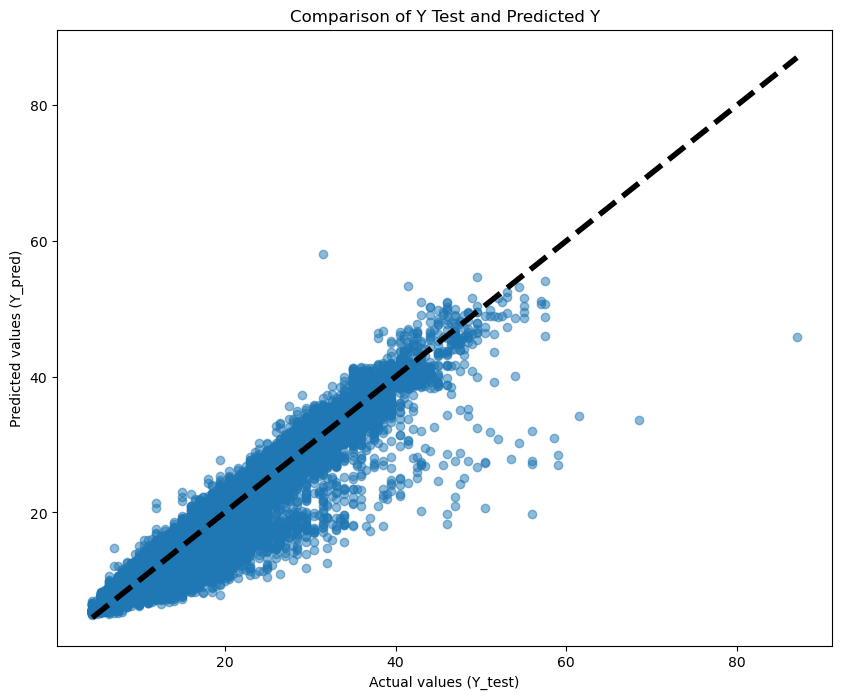

In [25]:
# Assuming you have a trained model named 'best_model3' and test set features 'X_test'
y_pred = best_model3.predict(X_test)

# Now create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Comparison of Y Test and Predicted Y')
plt.xlabel('Actual values (Y_test)')
plt.ylabel('Predicted values (Y_pred)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Plot a diagonal line
plt.show()

#### Drawbacks
Gradient Boosting gave a very high R^2 value of 95.34% however the algoritm has several drawbacks. The XGBoost algorithm involves many hyperparameters that need to be tuned which can be very time consuming. This leads to a computational intense model expesically when lots of data is involved and a high number of trees (n_estimators) is needed. Additionally, the algoritm is an an ensemble method that combines many decision trees which is not as interpretable as a highly interpretable method such as linear regression

## K-Nearest Neighbors Regression
We chose to use K-Nearest Neighbors (KNN) Regression because it is simple, easy to use, and doesn't require any assumptions about how the data is distributed. This is great for our complex dataset where traditional assumptions may not hold true. KNN also doesn't require a lot of tweaking, which allows us to focus on refining our feature set. 

We're particularly interested in understanding the impact of the features we engineered, and although KNN doesn't provide feature importance scores, we can evaluate the significance of our chosen features by analyzing how different feature configurations affect KNN's performance. This will help us understand which features are most important and how they relate to our target variable. This approach will allow us to refine our model and gain valuable insights into the underlying data relationships.

In [26]:
# Imports
from sklearn.neighbors import KNeighborsRegressor

#### Determining K Value
We chose specific k values (3, 4, 5, 7, 9, 11) for testing in the K-Nearest Neighbors (KNN) Regression model based on a strategic approach aimed at balancing model complexity and generalization ability. Starting with a small number of neighbors allows the model to capture more detailed patterns in the data, but this may lead to overfitting where the model is too closely tailored to the training set. As the number of neighbors increases, the model takes a broader context into account, reducing variance but potentially underfitting by smoothing predictions too much.

Our chosen k values provide a range of models from fine-grained to more generalized, allowing us to investigate the trade-off between capturing detailed data relationships and maintaining robustness to unseen data. This range avoids the extremes of too few (sensitive to noise) and too many neighbors (losing relevant information), aiming to find the optimal balance where the model performs best on unseen data, measured by metrics like R-squared, MSE, and RMSE.


In [27]:
neighbors_settings = [3, 4, 5, 7, 9, 11]

for n_neighbors in neighbors_settings:
    # Build the model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Test the model
    # R-squared
    r2 = r2_score(y_test, y_pred)
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse) 
    
    print(f"R^2 for {n_neighbors} neighbors: {r2}")
    print(f"MSE for {n_neighbors} neighbors: {mse}")
    print(f"RMSE for {n_neighbors} neighbors: {rmse}")

R^2 for 3 neighbors: 0.9167395562237907
MSE for 3 neighbors: 6.026877396954081
RMSE for 3 neighbors: 2.4549699380957968
R^2 for 4 neighbors: 0.917296154510147
MSE for 4 neighbors: 5.986587560879693
RMSE for 4 neighbors: 2.4467504083742773
R^2 for 5 neighbors: 0.9160188768906401
MSE for 5 neighbors: 6.079044377892731
RMSE for 5 neighbors: 2.4655718156023627
R^2 for 7 neighbors: 0.9128714870104566
MSE for 7 neighbors: 6.306870847077373
RMSE for 7 neighbors: 2.511348412123928
R^2 for 9 neighbors: 0.9091185582051136
MSE for 9 neighbors: 6.578529761724698
RMSE for 9 neighbors: 2.5648644723892717
R^2 for 11 neighbors: 0.9058390007629915
MSE for 11 neighbors: 6.815923291274751
RMSE for 11 neighbors: 2.6107323285382495


The evaluation of the KNN regression model across varying numbers of neighbors reveals the superiority of the model with 4 neighbors in terms of key performance metrics. This model stands out with an impressive R^2 value of 0.9173, indicating a strong ability to explain the variance in the target variable. Additionally, it showcases the lowest Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) of 5.9866 and 2.4468, respectively, suggesting the smallest average prediction error.

Taken together, these results suggest that the KNN model with 4 neighbors achieves the best balance between capturing the underlying patterns in the data and generalizing well to unseen data. This model's performance is particularly noteworthy, providing a compelling argument for its use in modeling and prediction tasks.

#### Drawbacks with Model
Although the KNN regression model, especially with 4 neighbors, has shown impressive performance, it's not without limitations. Some of the possible limiations or drawbacks are: 
1. KNN can be computationally intensive, particularly as the dataset size grows. This is because it requires computing the distance between each query point and all other points in the dataset to identify the nearest neighbors. As a result, scalability can become an issue for large datasets.

2. KNN's performance heavily relies on the choice of distance metric and feature relevance. Irrelevant or highly correlated features can significantly degrade the model's accuracy.

3. KNN doesn't handle categorical variables well and requires pre-processing to convert them into a suitable numeric format.

4. KNN makes predictions based solely on the nearest neighbors, it can be sensitive to noise in the data, leading to overfitting, especially with an excessively low value of k.


# Neural Network
This notebook outlines the building and training of **two-layer** and **three-layer** Recurrent Neural Networks (RNNs) for predicting Uber rideshare prices based on historical data. The model is compiled with the Adam optimizer and mean squared error loss function. Training involves 100 epochs with a batch size of 32 and includes a validation split to monitor performance on unseen data.

In [28]:
# Import necessary libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch, HyperParameters

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Normalize features
scaler_x = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_x.fit_transform(X)

# Normalize target variable
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(df[['price']])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

#### What is a Neural Network?
The **Neural Network** is a cornerstone of deep learning - it consists of layers of interconnected nodes or "neurons," each capable of performing simple calculations. These neurons are organized in layers: an input layer that receives the data, hidden layers that process the data through weights and activation functions, and an output layer that produces the prediction or classification. This model is inspired by the structure and functions of the human brain's neural networks. Neural networks learn and improve their performance by adjusting the weights of connections between neurons based on the error of their predictions through the training process.
### Initial Definition and Training of the RNN Models
We construct a Sequential neural network comprised of one or two Long Short-Term Memory (LSTM) layers followed by a Dense layer. The LSTM layers are to capture long-term dependencies in sequential data, which makes them useful for time series forecasting or where the sequence of data points is crucial.
- The first LSTM layer contains 60 units and uses the ReLU activation function, with return_sequences=True to ensure that the output for each timestep is returned. This is so the next LSTM layer can receive sequences as inputs (architecture for stacking LSTM layers) The input_shape is defined as (1, X_train.shape[2]), which means that each input sequence consists of 1 timestep with a number of features equal to X_train.shape[2].
- The second LSTM layer, in the 3-layer model, also has 60 units and uses the ReLU activation function. This layer does not return sequences, so the model's output can transition from sequences to a single value prediction per input sequence.
- Finally, these is a Dense layer with a single unit, this is for producing the model's final output. 

In [ ]:
# Simple RNN model architecture with 2 layers

# Initialize the Sequential model
model = Sequential()

# Add an Input layer to define the input shape
model.add(Input(shape=(1, X_train.shape[2])))

# Only one LSTM layer with 60 units, using ReLU activation function
# No return_sequences needed as it connects directly to a Dense layer next
model.add(LSTM(60, activation='relu'))

# Dense output layer with a single unit for regression output
model.add(Dense(1))

In [ ]:
# RNN model architecture - 3 Layers

# Initialize the Sequential model
model2 = Sequential()

# Add an Input layer to define the input shape
model2.add(Input(shape=(1, X_train.shape[2])))

# First LSTM layer with 60 units, using ReLU activation function
model2.add(LSTM(60, activation='relu', return_sequences=True))

# Second LSTM layer, also returning sequences
# return_sequences=False by default, preparing for connection to Dense layer
model2.add(LSTM(60, activation='relu'))

# Dense output layer with a single unit for regression output
model2.add(Dense(1))

Next, we compile the models, and specify how they should be trained.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model2.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

### Model Evaluation

In [ ]:
# Evaluate the 2-layer model on the training and test set
train_loss_model = model.evaluate(X_train, y_train, verbose=0)
test_loss_model = model.evaluate(X_test, y_test, verbose=0)

# Convert losses from MSE to RMSE for the 2-layer model
train_loss_rmse_model = np.sqrt(train_loss_model)
test_loss_rmse_model = np.sqrt(test_loss_model)

# Predictions for training and test set using the 2-layer model
y_train_pred_model = model.predict(X_train)
y_test_pred_model = model.predict(X_test)

# R^2 score for training and test set using the 2-layer model
train_r2_model = r2_score(y_train, y_train_pred_model)
test_r2_model = r2_score(y_test, y_test_pred_model)

# Print the evaluation metrics for the 2-layer model
print("2-Layer Model Metrics:")
print(f'Training Loss (MSE): {train_loss_model:.4f}')
print(f'Training Loss (RMSE): {train_loss_rmse_model:.4f}')
print(f'Test Loss (MSE): {test_loss_model:.4f}')
print(f'Test Loss (RMSE): {test_loss_rmse_model:.4f}')
print(f'Training R^2 Score: {train_r2_model:.4f}')
print(f'Test R^2 Score: {test_r2_model:.4f}')

In [ ]:
# Evaluate the 3-layer model on the training and test set
train_loss_model2 = model2.evaluate(X_train, y_train, verbose=0)
test_loss_model2 = model2.evaluate(X_test, y_test, verbose=0)

# Convert losses from MSE to RMSE for the 3-layer model
train_loss_rmse_model2 = np.sqrt(train_loss_model2)
test_loss_rmse_model2 = np.sqrt(test_loss_model2)

# Predictions for training and test set using the 3-layer model
y_train_pred_model2 = model2.predict(X_train)
y_test_pred_model2 = model2.predict(X_test)

# R^2 score for training and test set using the 3-layer model
train_r2_model2 = r2_score(y_train, y_train_pred_model2)
test_r2_model2 = r2_score(y_test, y_test_pred_model2)

# Print the evaluation metrics for the 3-layer model
print("\n3-Layer Model Metrics:")
print(f'Training Loss (MSE): {train_loss_model2:.4f}')
print(f'Training Loss (RMSE): {train_loss_rmse_model2:.4f}')
print(f'Test Loss (MSE): {test_loss_model2:.4f}')
print(f'Test Loss (RMSE): {test_loss_rmse_model2:.4f}')
print(f'Training R^2 Score: {train_r2_model2:.4f}')
print(f'Test R^2 Score: {test_r2_model2:.4f}')

In [ ]:
# Evaluate the best model on the training and test set
train_loss_best_model = best_model.evaluate(X_train, y_train, verbose=0)
test_loss_best_model = best_model.evaluate(X_test, y_test, verbose=0)

# Convert losses from MSE to RMSE for the best model
train_loss_rmse_best_model = np.sqrt(train_loss_best_model)
test_loss_rmse_best_model = np.sqrt(test_loss_best_model)

# Predictions for training and test set using the best model
y_train_pred_best_model = best_model.predict(X_train)
y_test_pred_best_model = best_model.predict(X_test)

# Ensure the predictions are appropriately shaped for regression tasks
y_train_pred_best_model = y_train_pred_best_model.flatten()
y_test_pred_best_model = y_test_pred_best_model.flatten()

# R^2 score for training and test set using the best model
train_r2_best_model = r2_score(y_train, y_train_pred_best_model)
test_r2_best_model = r2_score(y_test, y_test_pred_best_model)

# Print the evaluation metrics for the best model
print("\nBest Model Metrics:")
print(f'Training Loss (MSE): {train_loss_best_model:.4f}')
print(f'Training Loss (RMSE): {train_loss_rmse_best_model:.4f}')
print(f'Test Loss (MSE): {test_loss_best_model:.4f}')
print(f'Test Loss (RMSE): {test_loss_rmse_best_model:.4f}')
print(f'Training R^2 Score: {train_r2_best_model:.4f}')
print(f'Test R^2 Score: {test_r2_best_model:.4f}')

**Adding an Additional Layer?**
Given the performance metrics of the 3-layer RNN model, there's little indication that the model is underfitting and the model captures the underlying patterns in the dataset effectively. Adding a fourth layer likely will not significantly improve performance and could potentially instead lead to overfitting and lead to less computational efficiency. 

In [ ]:
metrics_2_layer = [train_loss_model, test_loss_model, train_loss_rmse_model, test_loss_rmse_model, train_r2_model, test_r2_model]
metrics_3_layer = [train_loss_model2, test_loss_model2, train_loss_rmse_model2, test_loss_rmse_model2, train_r2_model2, test_r2_model2]
labels = ['Train MSE', 'Test MSE', 'Train RMSE', 'Test RMSE', 'Train R^2', 'Test R^2']

x = np.arange(len(labels))  
width = 0.4  

fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size for better visibility
rects1 = ax.bar(x - width/2, metrics_2_layer, width, label='2-Layer Model', alpha=0.8, color='lightseagreen')
rects2 = ax.bar(x + width/2, metrics_3_layer, width, label='3-Layer Model', alpha=0.8, color='gold')
ax.set_ylim(0, max(metrics_2_layer + metrics_3_layer) * 1.15)

# labels, title, x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Scores by Model and Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)  # Rotate for better readability
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend out of the plot

# add labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

The 3-layer model has a slight improvement over the 2-layer model across most metrics. So, adding an additional LSTM layer helped capture more complex dependencies in the sequence data, leading to more accurate predictions. But, the marginal gains need to be weighed against increased computational complexity and training time. The R^2 scores for both training and test sets are high and close to 1, which indicates that the models can account for a significant proportion of variance in the target variable. 

In [ ]:
# Define a subset size for visualization
subset_size = 100  # Adjust as necessary

# Select a subset of actual and predicted prices
subset_indices = np.random.choice(a=len(y_test), size=subset_size, replace=False)  # Randomly select indices
actual_prices_subset = y_scaler.inverse_transform(y_test[subset_indices])
predicted_prices_model_subset = y_scaler.inverse_transform(model.predict(X_test[subset_indices]))
predicted_prices_model2_subset = y_scaler.inverse_transform(model2.predict(X_test[subset_indices]))

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(actual_prices_subset, label='Actual Prices', color='red')
plt.plot(predicted_prices_model_subset, label='2-Layer Predictions', color='lightseagreen', linestyle='--')
plt.title('2-Layer Model: Actual vs. Predicted Prices')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(actual_prices_subset, label='Actual Prices', color='red')
plt.plot(predicted_prices_model2_subset, label='3-Layer Predictions', color='gold', linestyle='--')
plt.title('3-Layer Model: Actual vs. Predicted Prices')
plt.xlabel('Samples')
plt.legend()

plt.tight_layout()
plt.show()

### Drawbacks

Some drawbacks of the Recurrent Neural Network (RNN), particularly LSTM (Long Short-Term Memory) models inclide trade-offs in complexity, computational demands, interpretability, and the effort and computational power required for feature engineering and hyperparameter tuning. The performance of neural networks heavily depends on the input features, so ignificant effort may be required in feature engineering and normalization so that the model receives high-quality inputs. Also, neural networks are "black boxes", in that they have high complexity and it is difficult to understand how they make predictions. This is drawback when we need to understand the decision-making process. Finally, deep learning models like LSTMs, are highly complex and have a large number of parameters, which can sometimes lead to overfitting, where the model learns the training data too well, including noise, making it less effective on unseen data.